## Setup

In [22]:
import pandas as pd
from pandas.io import sql
import sqlite3
import timeit
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

! pwd

/Users/nicholasbeaudoin/Desktop/ShotLink Analytics


In [23]:
# Create SQl DB connection
conn = sqlite3.connect('Shotlink.db')

In [24]:
# Query data for Tiger Woods
df = sql.read_sql("""SELECT * FROM Shotlink 
                WHERE PlayerLastName = 'Woods'""", con=conn)
print(len(df))

39140


In [25]:
### Data cleaning

# Create full player names
df['PlayerFullName'] = df['PlayerLastName'] + ", " + df['PlayerFirstName']

# Convert to numeric values
df['Round'] = pd.to_numeric(df['Round'], errors='coerce')
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
df['Hole'] = pd.to_numeric(df['Hole'], errors='coerce')
df['HoleScore'] = pd.to_numeric(df['HoleScore'], errors='coerce')
df['Yardage'] = pd.to_numeric(df['Yardage'], errors='coerce')
df['Shot'] = pd.to_numeric(df['Shot'], errors='coerce')
df['#ofStrokes'] = pd.to_numeric(df['#ofStrokes'], errors='coerce')
df['DistancetoPin'] = pd.to_numeric(df['DistancetoPin'], errors='coerce')
df['DistancetoHoleaftertheShot'] = pd.to_numeric(df['DistancetoHoleaftertheShot'], errors='coerce')
df['DistancefromEdge'] = pd.to_numeric(df['DistancefromEdge'], errors='coerce')
df['StrokesGained/Baseline'] = pd.to_numeric(df['StrokesGained/Baseline'], errors='coerce')

### Normalize Distances

df['DistanceYds'] = df['Distance']//36
df['DistancetoPinYds'] = df['DistancetoPin']//36
df['DistancetoHoleaftertheShotYds'] = df['DistancetoHoleaftertheShot']//36
#df['DistancefromCenterYds'] = df['DistancefromCenter']//36
df['DistancefromEdgeYds'] = df['DistancefromEdge']//36

df['DistanceFt'] = round(df['Distance']/12, 1)
df['DistancetoPinFt'] = round(df['DistancetoPin']/12, 1)
df['DistancetoHoleaftertheShotFt'] = round(df['DistancetoHoleaftertheShot']/12, 1)
#df['DistancefromCenterFt'] = round(df['DistancefromCenter']/12, 1)
df['DistancefromEdgeFt'] = round(df['DistancefromEdge']/12, 1)

## Longest hole-out for Woods

In [26]:
# Longest hole-out; subset to all shots that went into hole
new_df = df[(df['IntheHoleFlag'] == 'Y')]

# Farthest hole out in subset df
max_distance = new_df[(new_df['DistanceYds']) == max(new_df['DistanceYds'])]
max_distance

# Get the distance only
distance = max_distance['DistanceYds'].values[0]
distance

130

## Longest tee shot for Woods

In [10]:
# Longest drive in subset df
max_distance = df[(df['DistanceYds']) == max(df['DistanceYds'])]
max_distance

# Get the distance only
distance = max_distance['DistanceYds'].values[0]
distance

439

## Tiger Woods Fairway Percentage (2003-2018)

In [27]:
# Create unique years
years = set(df['Year'])

# Create dictionary to store years and percentages
dict = {}

# Loop through years and find Tiger's average fairway percetnage
for year in years:
    
    df_year = df[df['Year'] == year]
    
    # Subset for par 4/5s
    new_df = df_year[(df_year['ParValue'] == '04') | (df_year['ParValue'] == '05')]
    
    # Just tee shots (ignore NaN values)
    tee_shot_45_df = new_df[(new_df['Shot'] == 1) & (new_df['To Location(Scorer)'].notnull())]
    
    # Subset to greens and fairways (ignore NaN values)
    greens_fairways_df = tee_shot_45_df[(tee_shot_45_df['To Location(Scorer)'] == 'Green') | (tee_shot_45_df['To Location(Scorer)'] == 'Fairway')]
    
    # Calculate percentage fairways
    percentage = len(greens_fairways_df)/len(tee_shot_45_df)
    
    print(year)
    print(percentage)
    
    # Add to dictionary
    dict[year] = percentage

2008
0.5714285714285714
2005
0.5379901960784313
2018
0.5894308943089431
2009
0.6383928571428571
2012
0.625
2010
0.5443349753694581
2007
0.6022727272727273
2011
0.46616541353383456
2014
0.5357142857142857
2015
0.5565476190476191
2017
0.2857142857142857
2004
0.5723350253807107
2003
0.6441798941798942
2013
0.6245847176079734
2006
0.6015037593984962


In [28]:
# Convert dictionary into Pandas DF
fairway_df = pd.DataFrame()
fairway_df['Year'] = dict.keys()
fairway_df['percentage'] = dict.values()

In [30]:
# Sort the values
fairway_df = fairway_df.sort_values(by='Year', ascending=False)

In [32]:
fairway_df.head()

,Year,percentage
2,2018,0.589431
10,2017,0.285714
9,2015,0.556548
8,2014,0.535714
13,2013,0.624585


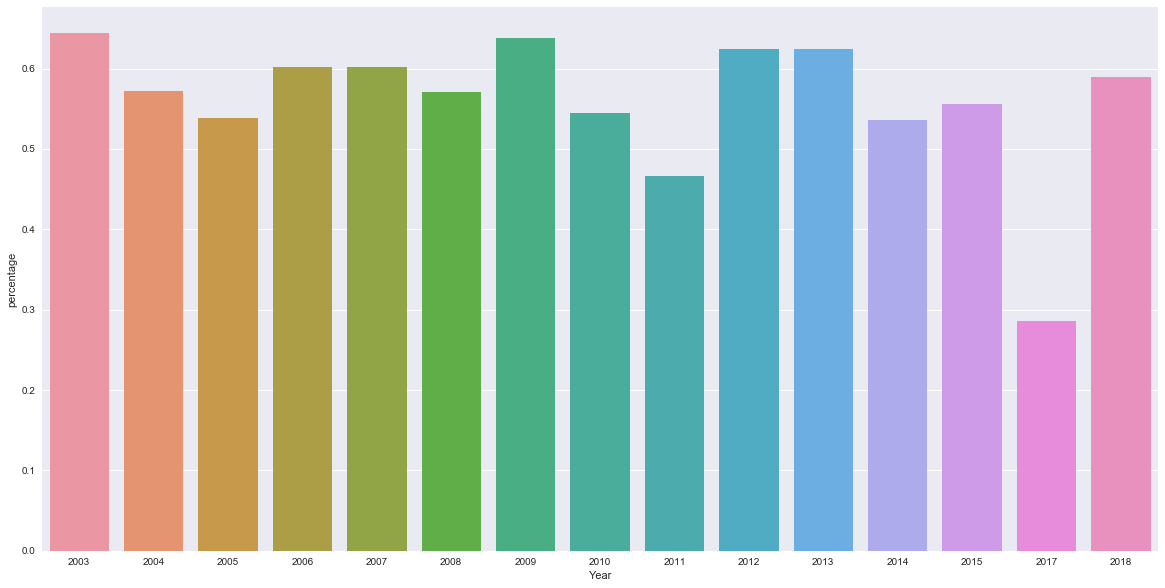

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,10


ax = sns.barplot(x="Year", y="percentage", data=fairway_df)